# Question 1

Each speed dating participant was given a survey to fill out at the beginning of the event and were asked to rate themselves in five qualities: attractiveness, sincerity, intelligence, fun, and ambition, on a scale of 1-10. Throughout the night participants were able to rate their partners in these five categories as well. 

Of the total participants, how did matched and unmatched participants rate themselves and their partners in each of the five surveyed attributes: attractiveness, sincerity, intelligence, fun, and ambition?
- Matched participants rated partners high, as expected. Favorably across all attributes but particularly in attractiveness
- Unmatched participants rated themselves higher, most notably in intelligence
- Matched and unmatched participants rated themselves similarly across all attributes
 

In [415]:
#importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import seaborn as sns

In [416]:
#import the dataset and display the first fiev rows to validate
dating_data = pd.read_csv('Output/CleanedSpeed.csv')
dating_data.head()

,Unique ID,Gender,Wave,Match,Same Race,Age of Partner,Race of Partner,Partner Preference Attractive,Partner Preference Sincere,Partner Preference Intelligence,...,Own Rating Ambition,Decision,Estimation of Matches,Number of Dates,Your Preference Attractive Post-Date,Your Preference Sincere Post-Date,Your Preference Intelligence Post-Date,Your Preference Fun Post-Date,Your Preference Ambition Post-Date,Your Preference Shared Interests Post-Date
0,1,0,1,0,0,27.0,2.0,35.0,20.0,20.0,...,7.0,1,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0
1,1,0,1,0,0,22.0,2.0,60.0,0.0,0.0,...,7.0,1,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0
2,1,0,1,1,1,22.0,4.0,19.0,18.0,19.0,...,7.0,1,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0
3,1,0,1,1,0,23.0,2.0,30.0,5.0,15.0,...,7.0,1,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0
4,1,0,1,1,0,24.0,3.0,30.0,10.0,20.0,...,7.0,1,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0


When looking at the overall data, only 16% of total speed dating participants recieved matches.

(-1.1002784943915884,
 1.1058480245432147,
 -1.1057241790621741,
 1.1064639539042107)

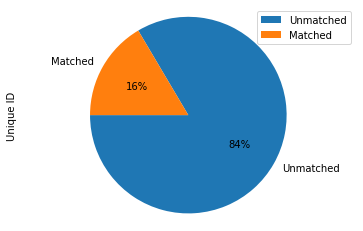

In [417]:
#To look at the data in comparison of matched versus unmatched:

#Create a variable for the labels you would like to use for your pie chart
labels = ["Unmatched", "Matched"]

#Group the data based on the specific column ("Matched", in this case) and then plot the data using pandas. 
# Include a legend, title, percentages, and pie chart angle
dating_data.groupby(["Match"]).count().plot(kind="pie", y= "Unique ID", labels = labels, autopct="%1.0f%%", legend=True, startangle=180)

#display chart
plt.axis("equal")

## Analysis for people who matched and their perceptions of the five qualities

In [116]:
#Isolate the matched data using the loc function to pull out the matched signifier of "1"
matched_df = dating_data.loc[(dating_data["Match"]==1)]

#Create a data frame 
matched_clean = matched_df[["Unique ID", "Partner Rating Attractive", "Partner Rating Sincere",
                    "Partner Rating Intelligence", "Partner Rating Fun", "Partner Rating Ambition",
                    "Own Rating Attractive", "Own Rating Sincere", "Own Rating Fun", "Own Rating Intelligence",
                    "Own Rating Ambition"]]

#Display the dataframe to verify
matched_clean

,Unique ID,Partner Rating Attractive,Partner Rating Sincere,Partner Rating Intelligence,Partner Rating Fun,Partner Rating Ambition,Own Rating Attractive,Own Rating Sincere,Own Rating Fun,Own Rating Intelligence,Own Rating Ambition
2,1,10.0,10.0,10.0,10.0,10.0,6.0,8.0,8.0,8.0,7.0
3,1,7.0,8.0,9.0,8.0,9.0,6.0,8.0,8.0,8.0,7.0
4,1,8.0,7.0,9.0,6.0,9.0,6.0,8.0,8.0,8.0,7.0
8,1,7.0,7.0,8.0,8.0,8.0,6.0,8.0,8.0,8.0,7.0
13,2,9.0,9.0,9.0,9.0,9.0,7.0,5.0,10.0,8.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
6795,552,10.0,9.0,9.0,8.0,7.0,8.0,7.0,6.0,7.0,7.0
6798,552,7.0,6.0,7.0,7.0,6.0,8.0,7.0,6.0,7.0,7.0
6800,552,7.0,7.0,8.0,7.0,7.0,8.0,7.0,6.0,7.0,7.0
6801,552,7.0,7.0,7.0,8.0,7.0,8.0,7.0,6.0,7.0,7.0


### Ratings of Attractiveness for both participant and partner on a scale of 1-10
The histograms for a participant's own ratings and for ratings of partners attractiveness are both unimodal. While the participants' personal ratings are skewed positively, their ratings of their partners are skewed more negatively. However based on the most frequent score used in both datasets, participants more frequently rated their partners as more attractive than themselves. 

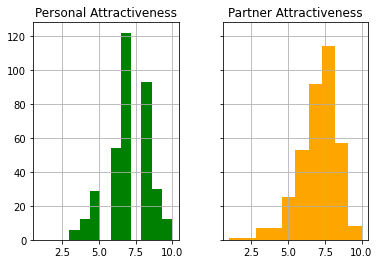

In [453]:
#Desginate variables for the specific columns needed to isolate attractiveness rating and find the mean for each
attractive_s = matched_clean.groupby(["Unique ID"]).mean()["Own Rating Attractive"]
attractive_p = matched_clean.groupby(["Unique ID"]).mean()["Partner Rating Attractive"]

#Create a dataframe using a dictionary of the variables and what you'd like the graph titles to be
attract_df = pd.DataFrame({"Personal Attractiveness" : attractive_s, 
                                "Partner Attractiveness" : attractive_p})

#Create subplots to easily show and compare the data, have the charts share both x and y axes for 
fig, axes = plt.subplots(1,2, sharex=True, sharey=True)

#Individually specify the aesthetics of each plot. Designate the type of plot (histogram), which variable to chart, 
# which subplot to use, and what color each should be
attract_df.hist("Personal Attractiveness", ax=axes[0], color="Green")
attract_df.hist("Partner Attractiveness", ax=axes[1], color="Orange")

#Display your charts
plt.show()

#Save the images to a separate folder in you repository
fig.savefig('output/Q1_images/Q1_fig_1.png')

### Ratings of Sincerity for both participant and partner
The histograms for a participant's own ratings and for ratings of partners sincerity are both unimodal. While the participants' personal ratings are skewed positively, their ratings of their partners are slightly more normally distrubuted. Both participants and partners were rated high in sincerity but partner ratings had a more frequent rating of 8. 

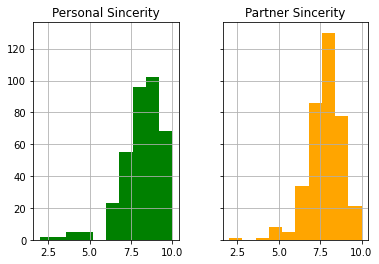

In [454]:
#Desginate variables for the specific columns needed to isolate sincerity rating and find the mean for each
sincerity_s = matched_clean.groupby(["Unique ID"]).mean()["Own Rating Sincere"]
sincerity_p = matched_clean.groupby(["Unique ID"]).mean()["Partner Rating Sincere"]

#Create a dataframe using a dictionary of the variables and what you'd like the graph titles to be
sincere_df = pd.DataFrame({"Personal Sincerity" : sincerity_s, 
                                "Partner Sincerity" : sincerity_p})

#Create subplots to easily show and compare the data, have the charts share both x and y axes for
fig, axes = plt.subplots(1,2, sharex=True, sharey=True)

#Individually specify the aesthetics of each plot. Designate the type of plot (histogram), which variable to chart, 
# which subplot to use, and what color each should be
sincere_df.hist("Personal Sincerity", ax=axes[0], color="Green")
sincere_df.hist("Partner Sincerity", ax=axes[1], color="Orange")

#Display your charts
plt.show()

#Save the images to a separate folder in you repository
fig.savefig('output/Q1_images/Q1_fig_2.png')

### Ratings of Intelligence for both participant and partner
The histograms for a participant's own ratings and for ratings of partners intelligence are both unimodal. While the participants' personal ratings are skewed  very positively, with the majority scoring 8 or higher, their ratings of their partners are slightly more normally distrubuted. Personal ratings were higher than partner ratings but partners were given a more frequent rating higher than 8. 

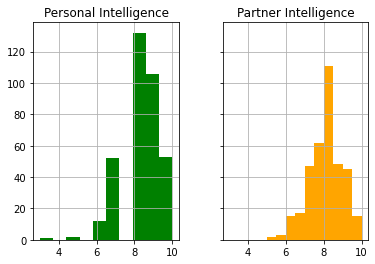

In [455]:
#Desginate variables for the specific columns needed to isolate intelligence rating and find the mean for each
intell_s = matched_clean.groupby(["Unique ID"]).mean()["Own Rating Intelligence"]
intell_p = matched_clean.groupby(["Unique ID"]).mean()["Partner Rating Intelligence"]

#Create a dataframe using a dictionary of the variables and what you'd like the graph titles to be
intell_df = pd.DataFrame({"Personal Intelligence" : intell_s, 
                                "Partner Intelligence" : intell_p})

#Create subplots to easily show and compare the data, have the charts share both x and y axes for
fig, axes = plt.subplots(1,2, sharex=True, sharey=True)

#Individually specify the aesthetics of each plot. Designate the type of plot (histogram), which variable to chart, 
# which subplot to use, and what color each should be
intell_df.hist("Personal Intelligence", ax=axes[0], color="Green")
intell_df.hist("Partner Intelligence", ax=axes[1], color="Orange")

#Display your charts
plt.show()

#Save the images to a separate folder in you repository
fig.savefig('output/Q1_images/Q1_fig_3.png')

### Ratings of Fun for both participant and partner
The histograms for a participant's own ratings and for ratings of partners fun are both unimodal. Both the personal and partner ratings are relatively normally distributed, Personal ratings were higher slightly higher in frequency than their ratings of partners.

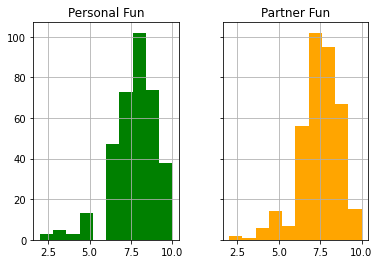

In [456]:
#Desginate variables for the specific columns needed to isolate fun rating and find the mean for each
fun_s = matched_clean.groupby(["Unique ID"]).mean()["Own Rating Fun"]
fun_p = matched_clean.groupby(["Unique ID"]).mean()["Partner Rating Fun"]

#Create a dataframe using a dictionary of the variables and what you'd like the graph titles to be
fun_df = pd.DataFrame({"Personal Fun" : fun_s, 
                                "Partner Fun" : fun_p})

#Create subplots to easily show and compare the data, have the charts share both x and y axes for
fig, axes = plt.subplots(1,2, sharex=True, sharey=True)

#Individually specify the aesthetics of each plot. Designate the type of plot (histogram), which variable to chart, 
# which subplot to use, and what color each should be
fun_df.hist("Personal Fun", ax=axes[0], color="Green")
fun_df.hist("Partner Fun", ax=axes[1], color="Orange")

#Display your charts
plt.show()

#Save the images to a separate folder in you repository
fig.savefig('output/Q1_images/Q1_fig_4.png')

### Ratings of Ambition for both participant and partner
The ambition histogram for a participant's personal ratings is unimodal whereas their partner's histogram is bimodal. The participants' histogram is more positively skewed and the partner's data is more normally distributed. Participants viewed their partners as slightly more or just slightly less ambitious than themselves.  

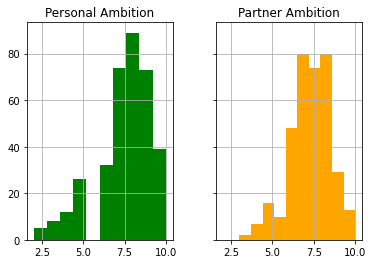

In [457]:
#Desginate variables for the specific columns needed to isolate ambition rating and find the mean for each
ambition_s = matched_clean.groupby(["Unique ID"]).mean()["Own Rating Ambition"]
ambition_p = matched_clean.groupby(["Unique ID"]).mean()["Partner Rating Ambition"]

#Create a dataframe using a dictionary of the variables and what you'd like the graph titles to be
ambition_df= pd.DataFrame({"Personal Ambition" : ambition_s, 
                                "Partner Ambition" : ambition_p})

#Create subplots to easily show and compare the data, have the charts share both x and y axes for
fig, axes = plt.subplots(1,2, sharex=True, sharey=True)

#Individually specify the aesthetics of each plot. Designate the type of plot (histogram), which variable to chart, 
# which subplot to use, and what color each should be
ambition_df.hist("Personal Ambition", ax=axes[0], color="Green")
ambition_df.hist("Partner Ambition", ax=axes[1], color="Orange")

#Display your charts
plt.show()

#Save the images to a separate folder in you repository
fig.savefig('output/Q1_images/Q1_fig_5.png')

## Analysis for people who matched and their perceptions of the five qualities
Of the partipants that did not matched with partners at the end of the night, how did they rate themselves on a scale of 1-10 in each specific quality as compared to their partners?

In [77]:
#Isolate the unmatched data using the loc function to pull out the unmatched signifier of "0"
unmatched_df = dating_data.loc[(dating_data["Match"]==0)]

#Create a data frame 
unmatched_clean = unmatched_df[["Unique ID", "Partner Rating Attractive", "Partner Rating Sincere",
                    "Partner Rating Intelligence", "Partner Rating Fun", "Partner Rating Ambition",
                    "Own Rating Attractive", "Own Rating Sincere", "Own Rating Fun", "Own Rating Intelligence",
                    "Own Rating Ambition"]]

#Display the dataframe to verify
unmatched_clean

,Unique ID,Partner Rating Attractive,Partner Rating Sincere,Partner Rating Intelligence,Partner Rating Fun,Partner Rating Ambition,Own Rating Attractive,Own Rating Sincere,Own Rating Fun,Own Rating Intelligence,Own Rating Ambition
0,1,6.0,8.0,8.0,8.0,8.0,6.0,8.0,8.0,8.0,7.0
1,1,7.0,8.0,10.0,7.0,7.0,6.0,8.0,8.0,8.0,7.0
5,1,7.0,7.0,8.0,8.0,7.0,6.0,8.0,8.0,8.0,7.0
6,1,3.0,6.0,7.0,5.0,8.0,6.0,8.0,8.0,8.0,7.0
7,1,6.0,7.0,5.0,6.0,8.0,6.0,8.0,8.0,8.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
6811,552,10.0,5.0,3.0,2.0,6.0,8.0,7.0,6.0,7.0,7.0
6812,552,6.0,3.0,7.0,3.0,7.0,8.0,7.0,6.0,7.0,7.0
6813,552,2.0,1.0,2.0,2.0,2.0,8.0,7.0,6.0,7.0,7.0
6814,552,5.0,7.0,5.0,5.0,3.0,8.0,7.0,6.0,7.0,7.0


### Ratings of Attractivenesss for both participant and partner
The histograms for unmatched participants and their partners an unimodal with participants rating themselves in a positively skewed way with a lot fo frequency around 7. Partipants rated their partners in a more normally distributed way with significantly lower scores with the majority occuring around a 6 or less. 

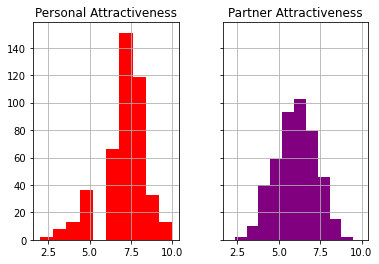

In [458]:
#Desginate variables for the specific columns needed to isolate attractiveness rating and find the mean for each
attract_s = unmatched_clean.groupby(["Unique ID"]).mean()["Own Rating Attractive"]
attract_p = unmatched_clean.groupby(["Unique ID"]).mean()["Partner Rating Attractive"]

#Create a dataframe using a dictionary of the variables and what you'd like the graph titles to be
unattract_df= pd.DataFrame({"Personal Attractiveness" : attract_s, 
                                "Partner Attractiveness" : attract_p})

#Create subplots to easily show and compare the data, have the charts share both x and y axes for
fig, axes = plt.subplots(1,2, sharex=True, sharey=True)

#Individually specify the aesthetics of each plot. Designate the type of plot (histogram), which variable to chart, 
# which subplot to use, and what color each should be
unattract_df.hist("Personal Attractiveness", ax=axes[0], color="red")
unattract_df.hist("Partner Attractiveness", ax=axes[1], color="purple")

#Display your charts
plt.show()

#Save the images to a separate folder in you repository
fig.savefig('output/Q1_images/Q1_fig_6.png')

### Ratings of Sincerity for both participant and partner
The histograms for sincerity saw participants rating themselves with a positive skew, the highest frequency of rating around 8. Conversely they rated their partners only slightly less with a score less than 7.5. The histograms are both unimodal.

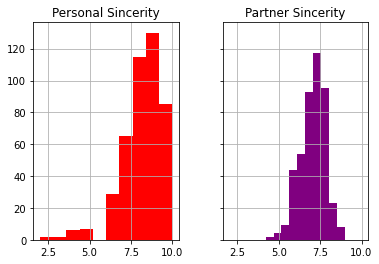

In [459]:
#Desginate variables for the specific columns needed to isolate sincerity rating and find the mean for each
unsincere_s = unmatched_clean.groupby(["Unique ID"]).mean()["Own Rating Sincere"]
unsincere_p = unmatched_clean.groupby(["Unique ID"]).mean()["Partner Rating Sincere"]

#Create a dataframe using a dictionary of the variables and what you'd like the graph titles to be
insincere_df= pd.DataFrame({"Personal Sincerity" : unsincere_s, 
                                "Partner Sincerity" : unsincere_p})

#Create subplots to easily show and compare the data, have the charts share both x and y axes for
fig, axes = plt.subplots(1,2, sharex=True, sharey=True)

#Individually specify the aesthetics of each plot. Designate the type of plot (histogram), which variable to chart, 
# which subplot to use, and what color each should be
insincere_df.hist("Personal Sincerity", ax=axes[0], color="red")
insincere_df.hist("Partner Sincerity", ax=axes[1], color="purple")

#Display your charts
plt.show()

#Save the images to a separate folder in you repository
fig.savefig('output/Q1_images/Q1_fig_7.png')

### Ratings of Intelligence for both participant and partner
The histograms for intelligence demonstrate the participants valued themselves high and their partners, slightly less. 

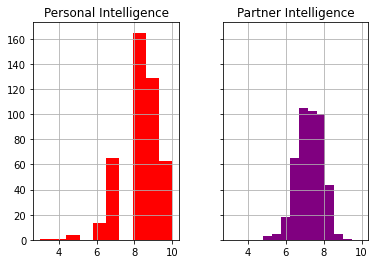

In [463]:
#Desginate variables for the specific columns needed to isolate intelligence rating and find the mean for each
unintell_s = unmatched_clean.groupby(["Unique ID"]).mean()["Own Rating Intelligence"]
unintell_p = unmatched_clean.groupby(["Unique ID"]).mean()["Partner Rating Intelligence"]

#Create a dataframe using a dictionary of the variables and what you'd like the graph titles to be
unintell_df= pd.DataFrame({"Personal Intelligence" : unintell_s, 
                                "Partner Intelligence" : unintell_p})

#Create subplots to easily show and compare the data, have the charts share both x and y axes for
fig, axes = plt.subplots(1,2, sharex=True, sharey=True)

#Individually specify the aesthetics of each plot. Designate the type of plot (histogram), which variable to chart, 
# which subplot to use, and what color each should be
unintell_df.hist("Personal Intelligence", ax=axes[0], color="red")
unintell_df.hist("Partner Intelligence", ax=axes[1], color="purple")

#Display your charts
plt.show()

#Save the images to a separate folder in you repository
fig.savefig('output/Q1_images/Q1_fig_8.png')

### Ratings of Fun for both participant and partner
Both histograms for participant and parnter fun are relatively normally distrubuted in a unimodal frame; with the partner fun ratings less high as personal ratings. 

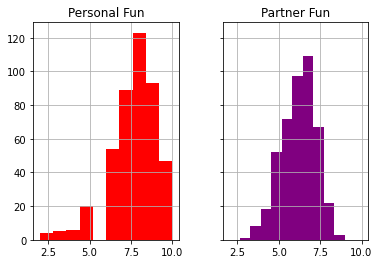

In [461]:
#Desginate variables for the specific columns needed to isolate fun rating and find the mean for each
unfunny_s = unmatched_clean.groupby(["Unique ID"]).mean()["Own Rating Fun"]
unfunny_p = unmatched_clean.groupby(["Unique ID"]).mean()["Partner Rating Fun"]

#Create a dataframe using a dictionary of the variables and what you'd like the graph titles to be
unfunny_df = pd.DataFrame({"Personal Fun" : unfunny_s, 
                                "Partner Fun" : unfunny_p})

#Create subplots to easily show and compare the data, have the charts share both x and y axes for
fig, axes = plt.subplots(1,2, sharex=True, sharey=True)

#Individually specify the aesthetics of each plot. Designate the type of plot (histogram), which variable to chart, 
# which subplot to use, and what color each should be
unfunny_df.hist("Personal Fun", ax=axes[0], color="red")
unfunny_df.hist("Partner Fun", ax=axes[1], color="purple")

#Display your charts
plt.show()
#Save the images to a separate folder in you repository
fig.savefig('output/Q1_images/Q1_fig_9.png')

### Ratings of Ambition for both participant and partner
The ambition historgrams for participants and their partners show participants view their partners as less ambitious than themselves in a unimodal dataset with the partner amibiton ratings relatively normally distributed. 

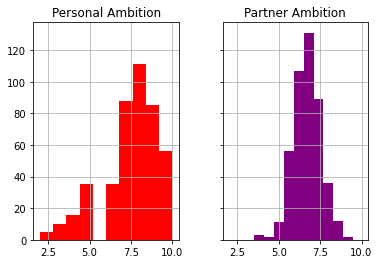

In [462]:
#Desginate variables for the specific columns needed to isolate ambition rating and find the mean for each
unambit_s = unmatched_clean.groupby(["Unique ID"]).mean()["Own Rating Ambition"]
unambit_p = unmatched_clean.groupby(["Unique ID"]).mean()["Partner Rating Ambition"]

#Create a dataframe using a dictionary of the variables and what you'd like the graph titles to be
unambitious_df = pd.DataFrame({"Personal Ambition" : unambit_s, 
                                "Partner Ambition" : unambit_p})

#Create subplots to easily show and compare the data, have the charts share both x and y axes for
fig, axes = plt.subplots(1,2, sharex=True, sharey=True)

#Individually specify the aesthetics of each plot. Designate the type of plot (histogram), which variable to chart, 
# which subplot to use, and what color each should be
unambitious_df.hist("Personal Ambition", ax=axes[0], color="red")
unambitious_df.hist("Partner Ambition", ax=axes[1], color="purple")

#Display your charts
plt.show()

#Save the images to a separate folder in you repository
fig.savefig('output/Q1_images/Q1_fig_10.png')
